In [82]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from sklearn.metrics import classification_report, confusion_matrix
import sweetviz

import warnings
import pickle

import ppscore as pps

import missingno as mno

warnings.filterwarnings("ignore")

In [83]:
train = pd.read_csv("train.csv")

In [84]:
print("Train data shape : ",train.shape)

Train data shape :  (614, 13)


In [85]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [87]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [90]:
train["Loan_Status"] = train["Loan_Status"].replace("Y" , 1)
train["Loan_Status"] = train["Loan_Status"].replace("N" , 0)

<Axes: ylabel='Loan_Status'>

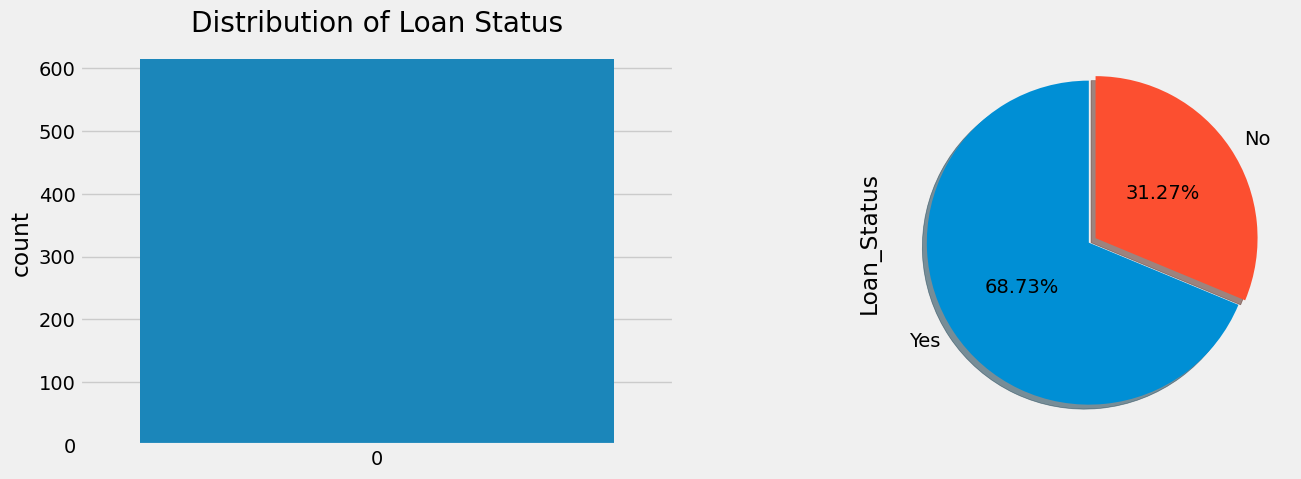

In [91]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['Loan_Status'],)
plt.title("Distribution of Loan Status")


plt.subplot(1, 2, 2)
train['Loan_Status'].value_counts().plot(kind = 'pie', explode = [0, 0.05], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Yes','No'], shadow = True, pctdistance = 0.5)

# Missing Value

<center>Treatment of Training Data Missing Values</center>

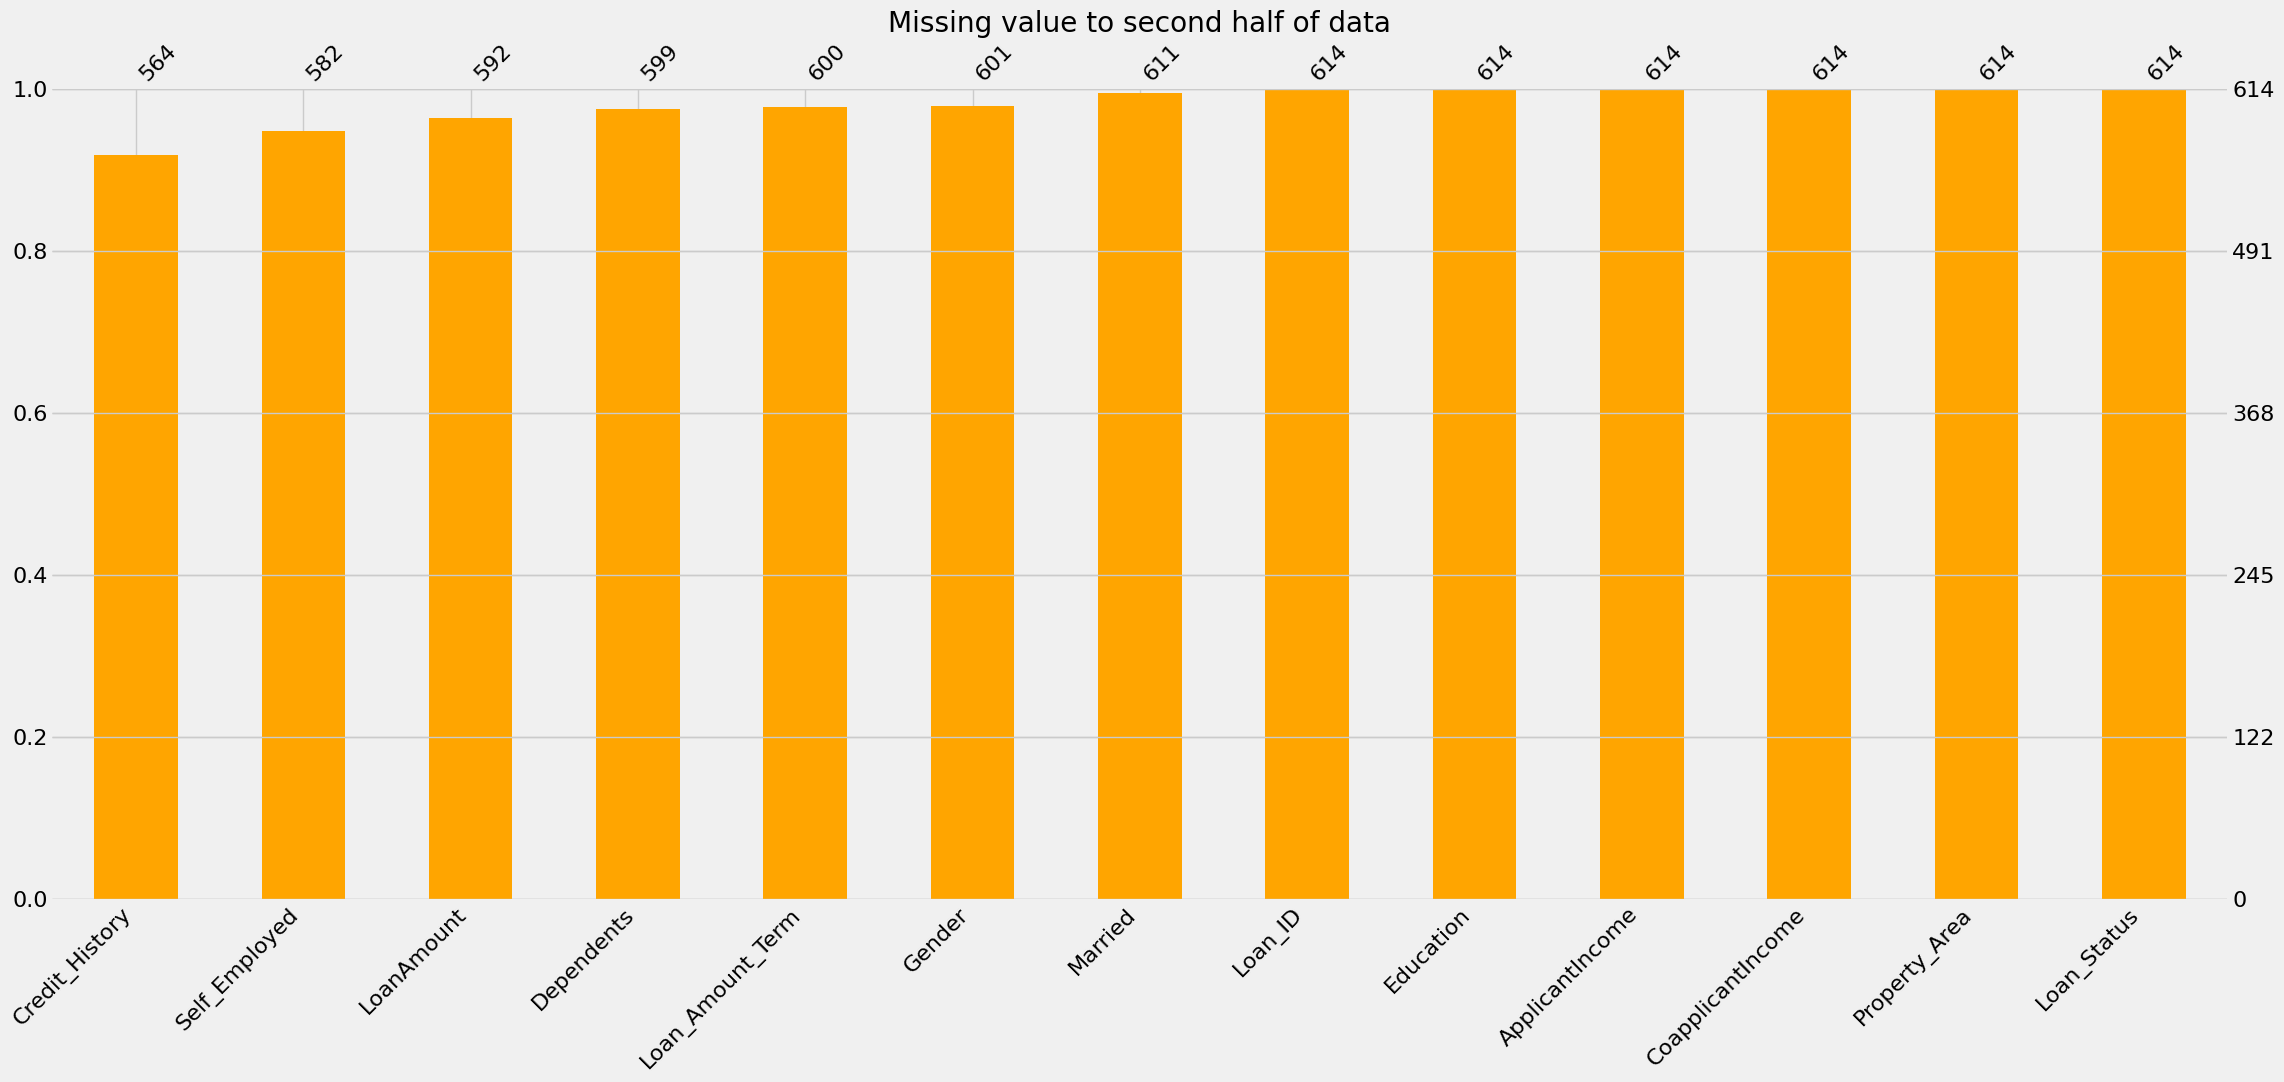

In [92]:

mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [93]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

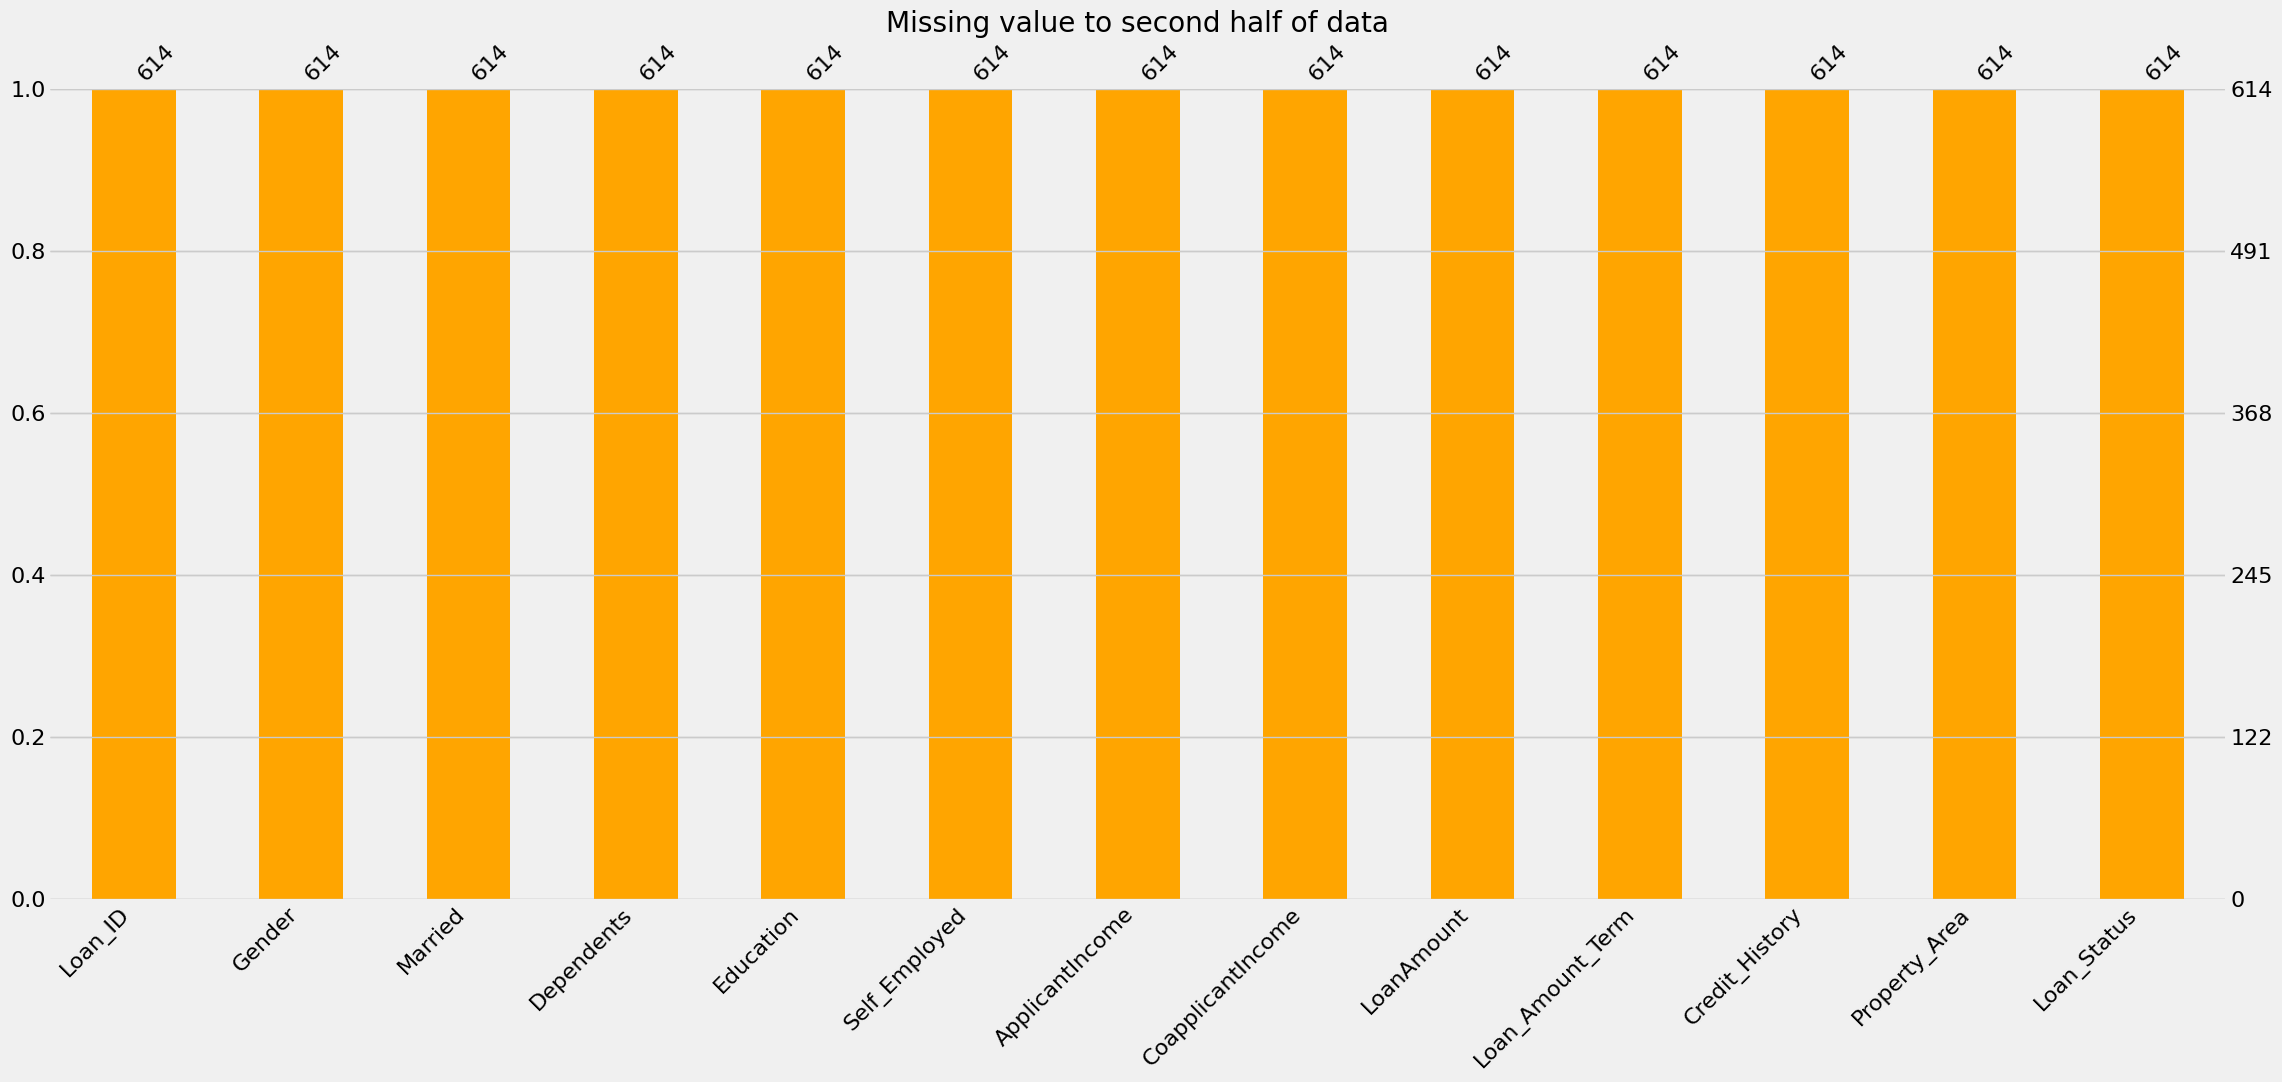

In [94]:
mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [95]:
train.isnull().sum().sum()

0

# Data Visualization

## <center>Univariate Analysis</center>

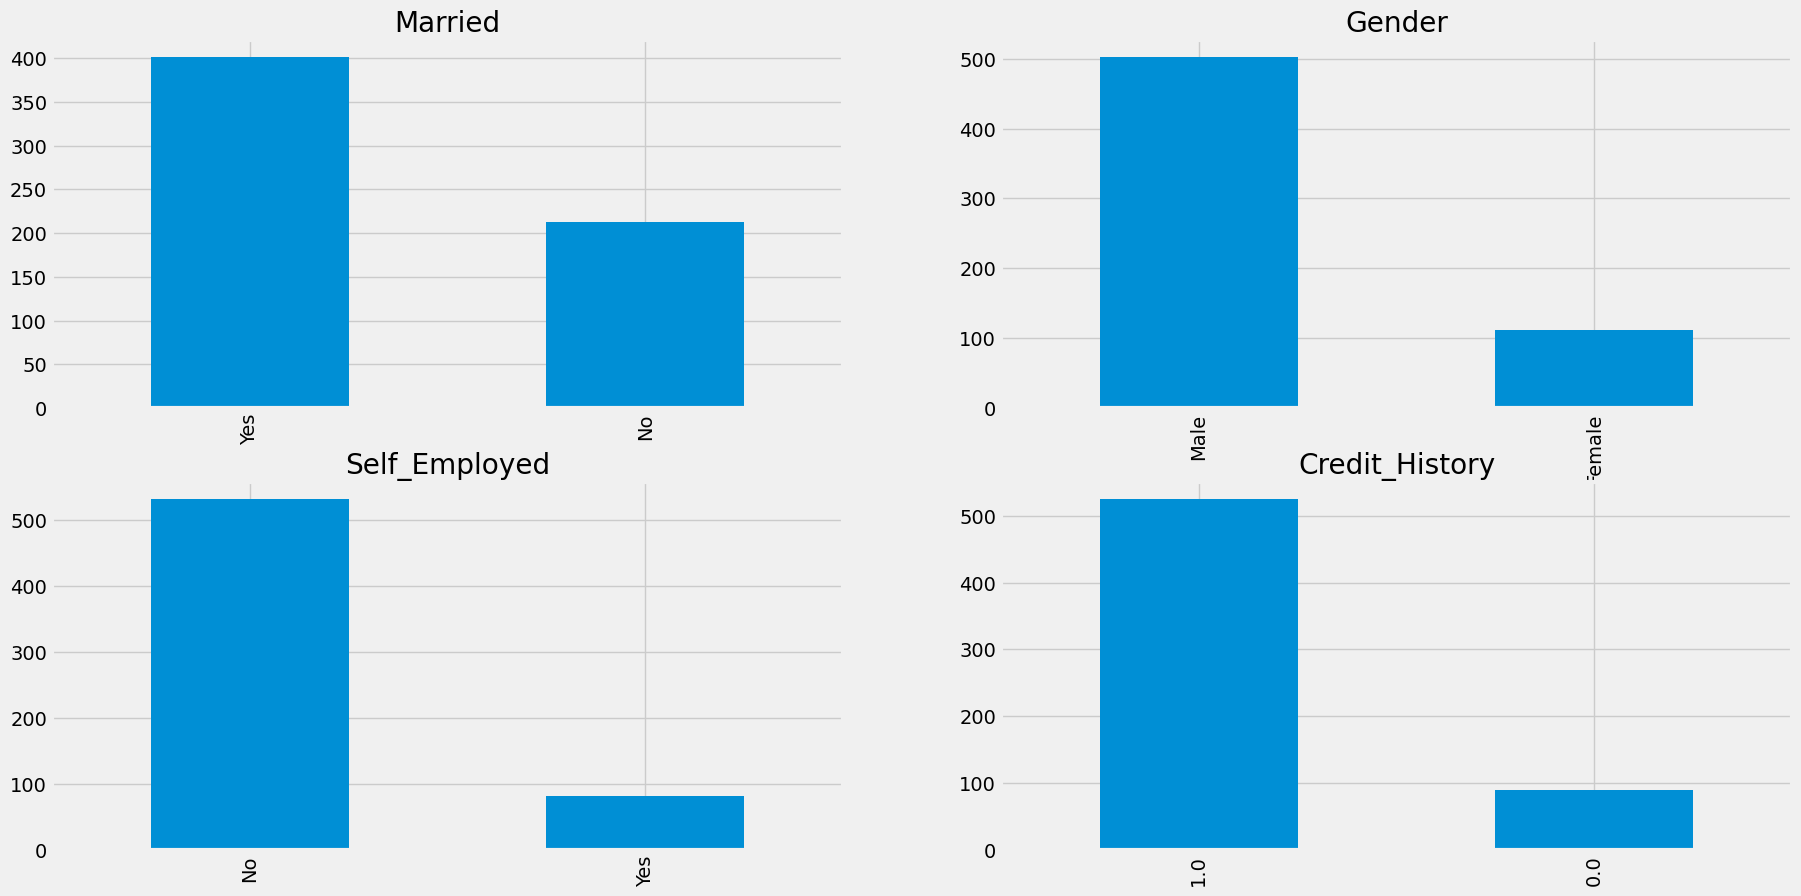

In [96]:

plt.subplot(2,2,1)
train["Married"].value_counts().plot.bar(figsize=(20,10))
plt.title("Married")

plt.subplot(2,2,2)
train["Gender"].value_counts().plot.bar()
plt.title("Gender")

plt.subplot(2,2,3)
train["Self_Employed"].value_counts().plot.bar()
plt.title("Self_Employed")

plt.subplot(2,2,4)
train["Credit_History"].value_counts().plot.bar()
plt.title("Credit_History")

plt.show()

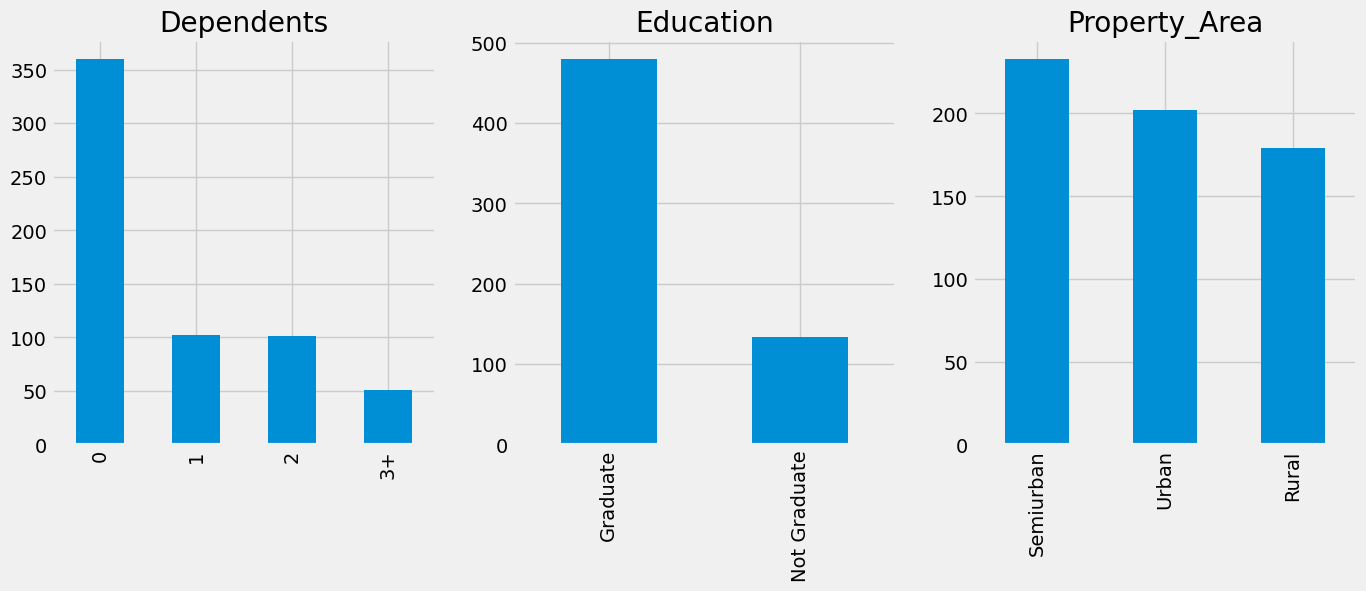

In [97]:
plt.subplot(1,3,1)
train["Dependents"].value_counts().plot.bar()
plt.title("Dependents")

plt.subplot(1,3,2)
train["Education"].value_counts().plot.bar()
plt.title("Education")

plt.subplot(1,3,3)
train["Property_Area"].value_counts().plot.bar()
plt.title("Property_Area")



plt.show()

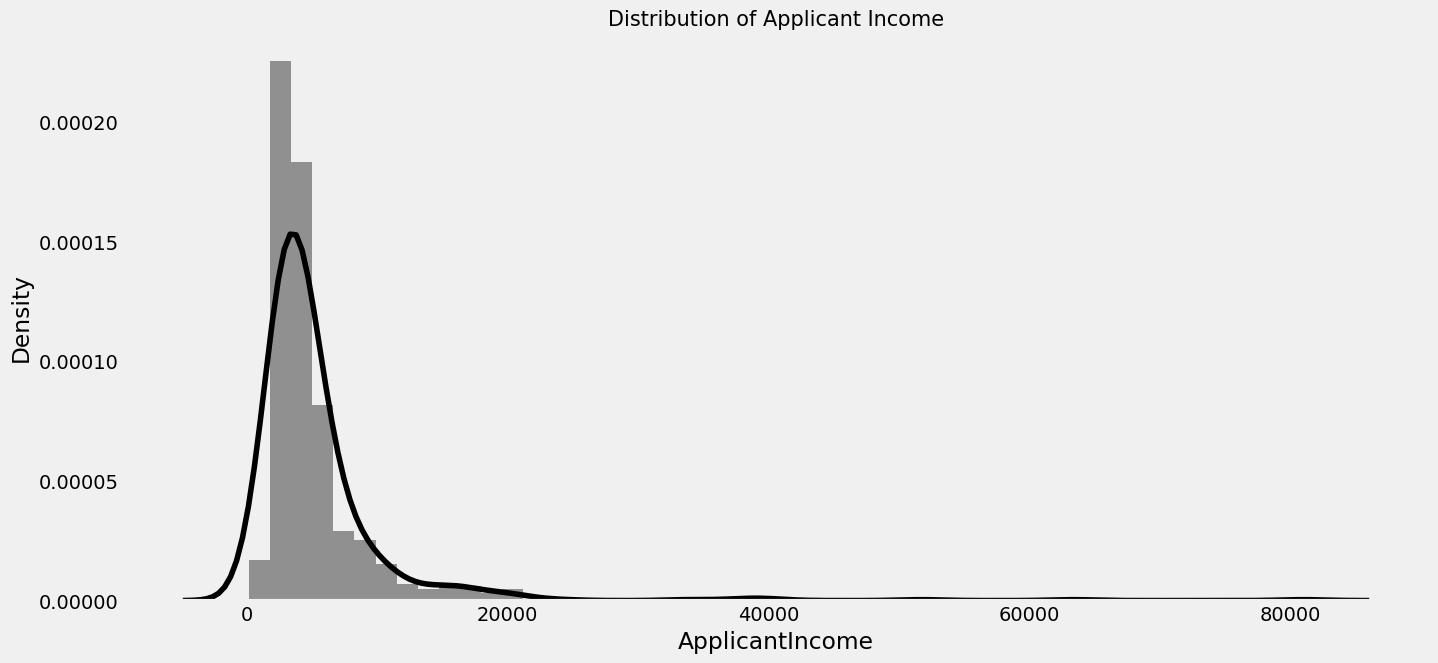

In [98]:
plt.rcParams["figure.figsize"] =(15,7)
sns.distplot(train["ApplicantIncome"], color="black")
plt.title("Distribution of Applicant Income", fontsize=15)
plt.grid()
plt.show()

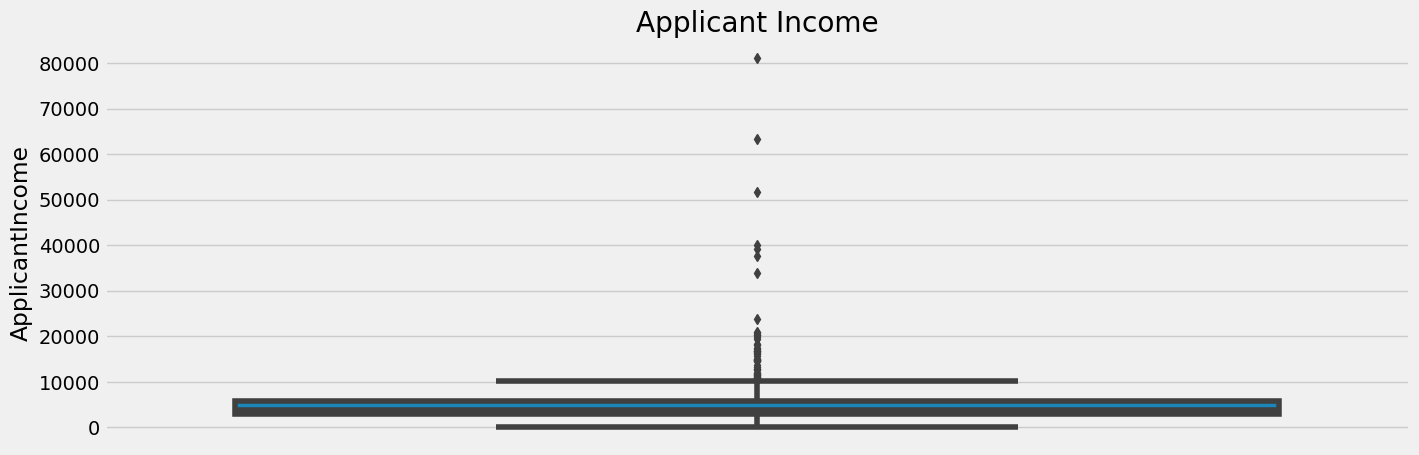

In [99]:
plt.rcParams["figure.figsize"] =(15,5)
sns.boxplot(y =train["ApplicantIncome"])
plt.title("Applicant Income")
plt.show()

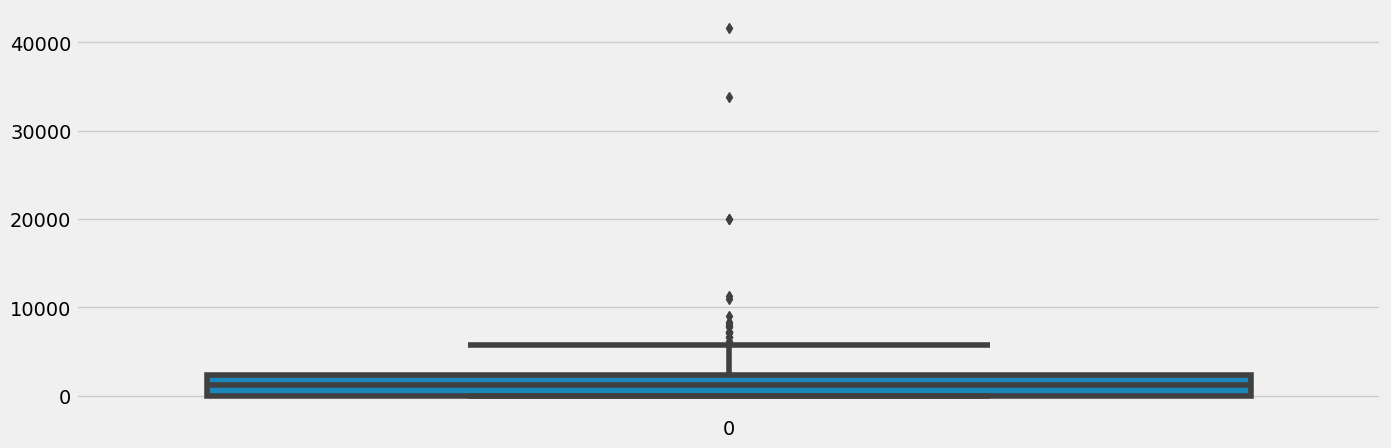

In [100]:
sns.boxplot(train["CoapplicantIncome"])
plt.show()

## <center>Bivariate Analysis</center>

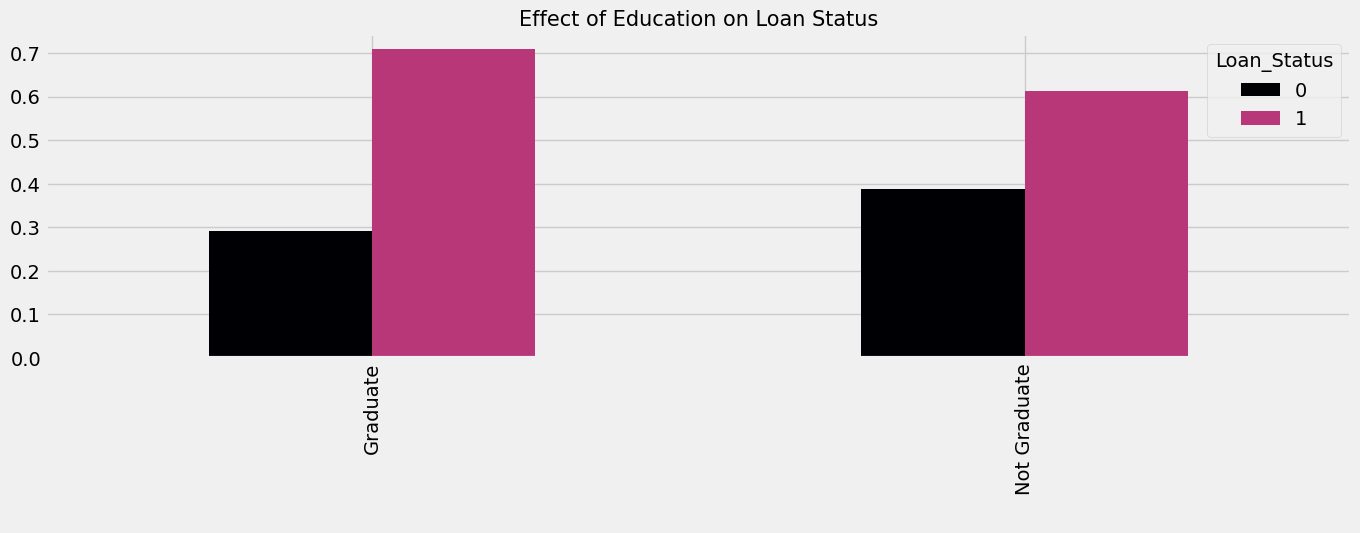

In [101]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Education'], train['Loan_Status'])
colors = plt.cm.magma(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

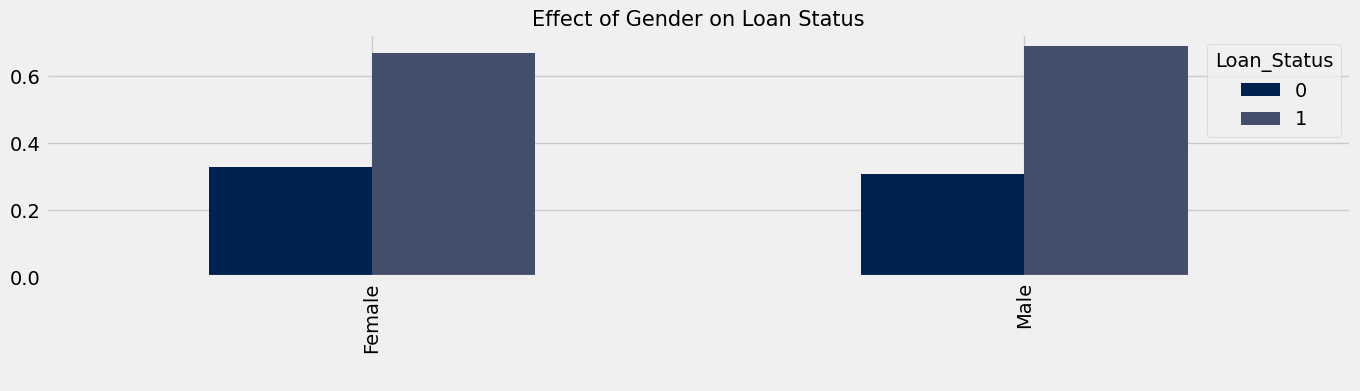

In [102]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['Gender'], train['Loan_Status'])
colors = plt.cm.cividis(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

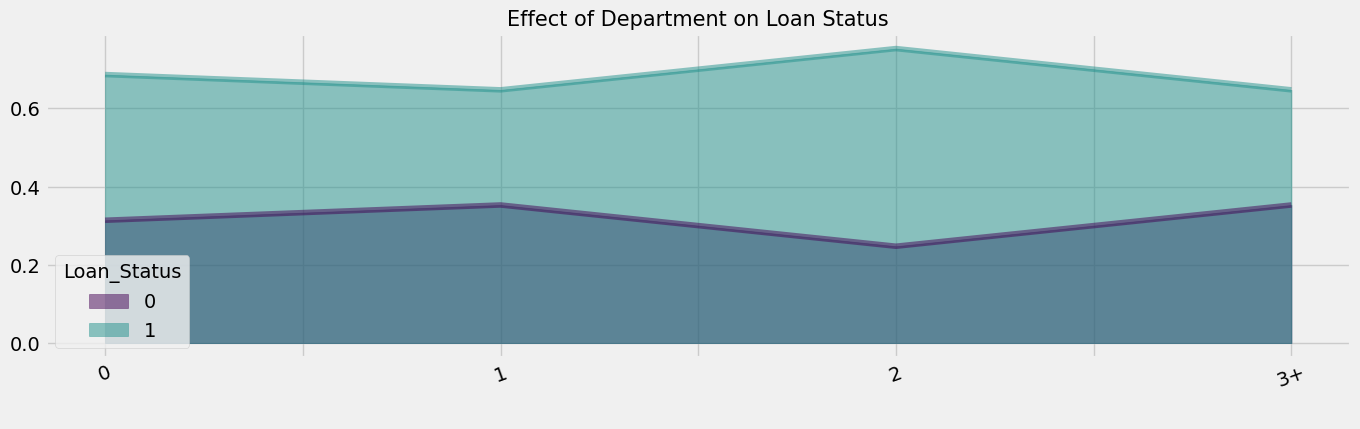

In [103]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Dependents'], train['Loan_Status'])
colors = plt.cm.viridis(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Loan Status', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

MULTIVARIANT

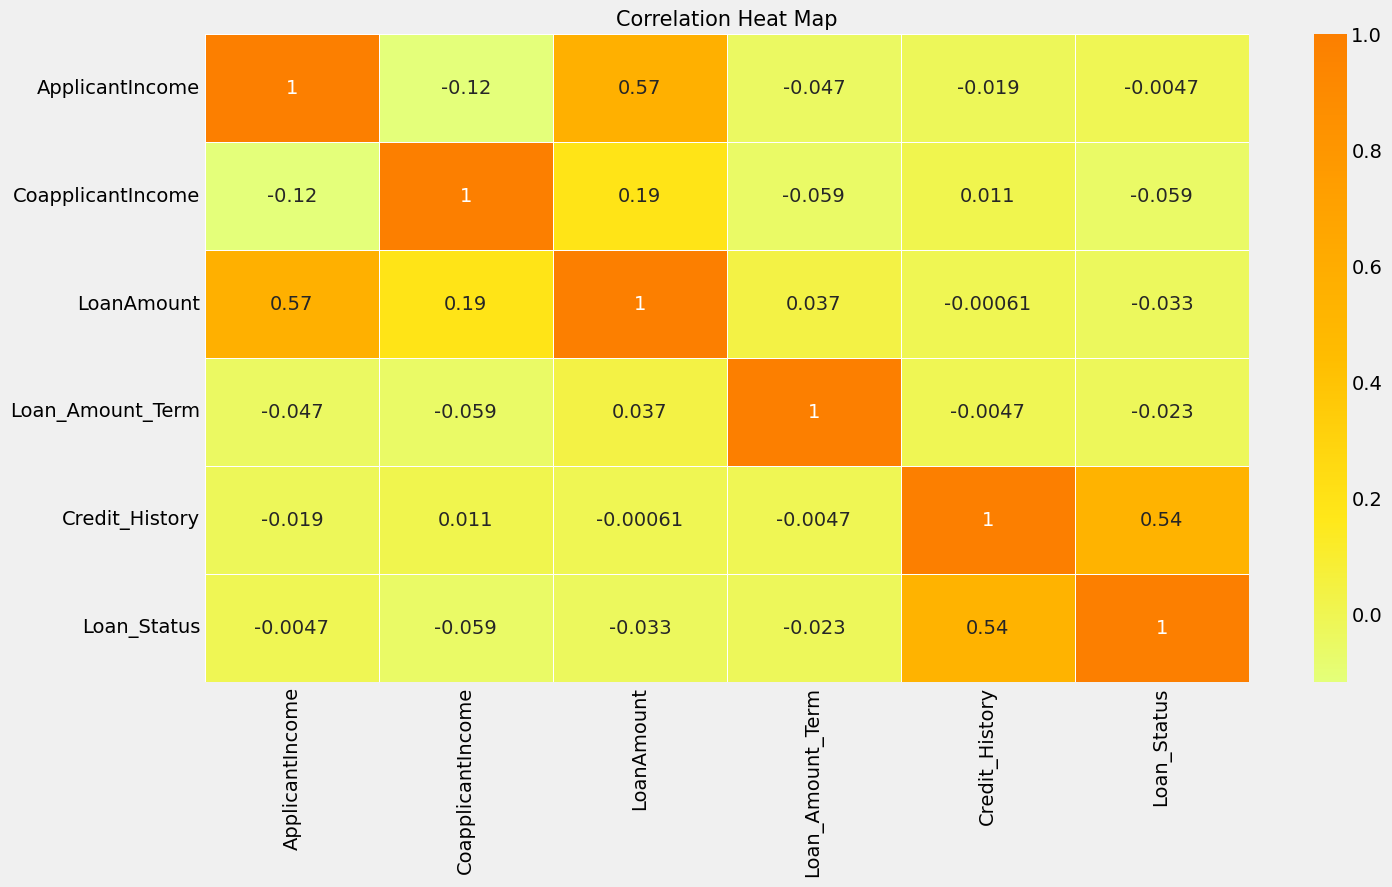

In [104]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Outlier Treatment

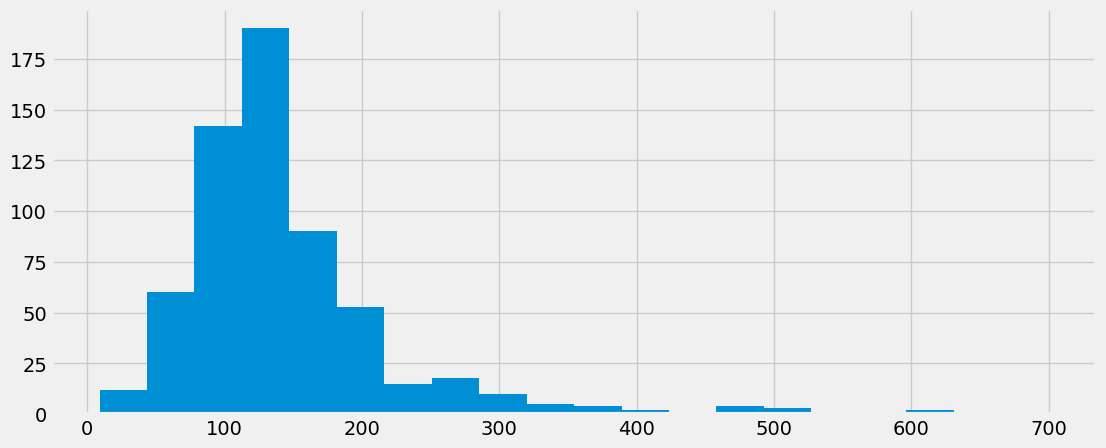

In [105]:
plt.rcParams["figure.figsize"] = (12,5)
train["LoanAmount"].hist(bins=20),
plt.show()

In [106]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])

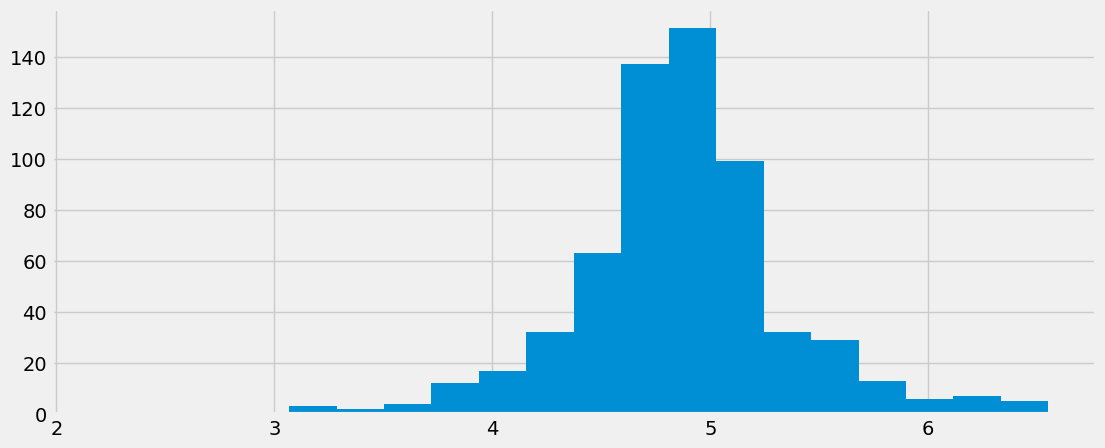

In [107]:
train["LoanAmount_log"].hist(bins=20)
plt.show()

In [108]:
train["total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

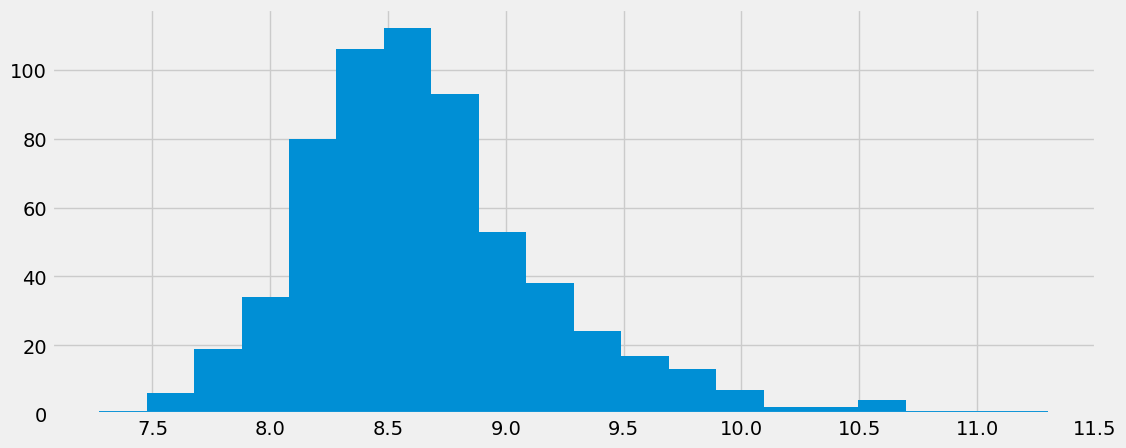

In [109]:
np.log(train["total_income"]).hist(bins=20)
plt.show()

In [110]:
train["total_income"] = np.log(train.total_income)

# Model Building

In [111]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'total_income'],
      dtype='object')

In [112]:
x_label = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

y_label = ["Loan_Status"]

In [113]:
train = train.drop(x_label,1)

In [114]:
x = train.drop("Loan_Status",1)
y = train.Loan_Status

In [115]:
print(x.shape)
print(y.shape)

(614, 10)
(614,)


In [116]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,4.948760,8.699515


In [117]:
x = pd.get_dummies(x)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify =y, random_state=0, shuffle=True)

In [119]:
y_test.value_counts(normalize=True)

1    0.686486
0    0.313514
Name: Loan_Status, dtype: float64

In [120]:
y_train.value_counts(normalize=True)

1    0.687646
0    0.312354
Name: Loan_Status, dtype: float64

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 19)
(185, 19)
(429,)
(185,)


###  Logistic Regression

In [122]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [123]:
lr.score(x_train, y_train)

0.8018648018648019

In [124]:
lr.score(x_test, y_test)

0.827027027027027

In [125]:
print("Accuracy is", lr.score(x_test, y_test))

Accuracy is 0.827027027027027


In [126]:
 y_pred = lr.predict(x_test)

In [127]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.802548,0.827027,0.883417,0.853255
recall,0.465517,0.992126,0.827027,0.728822,0.827027
f1-score,0.627907,0.887324,0.827027,0.757615,0.805993
support,58.000000,127.000000,0.827027,185.000000,185.000000


In [129]:
confusion_matrix(y_test, y_pred)

array([[ 27,  31],
       [  1, 126]], dtype=int64)

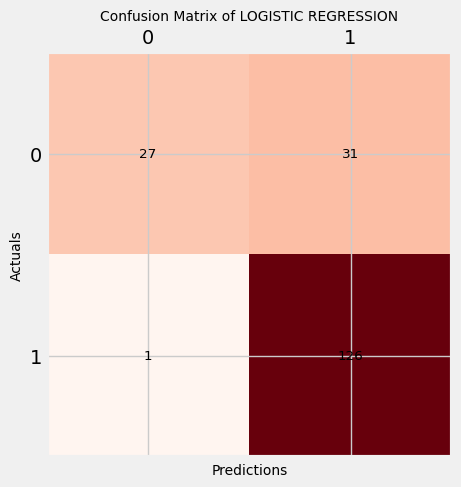

In [130]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-small')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix of LOGISTIC REGRESSION', fontsize=10)
plt.show()


# DecisionTreeClassifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dtc =  DecisionTreeClassifier()

In [133]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [134]:
dtc.score(x_train, y_train)

1.0

In [135]:
dtc.score(x_test, y_test)

0.7567567567567568

In [136]:
dtc = DecisionTreeClassifier(min_samples_split=20, max_depth=3 )

In [137]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20)

In [138]:
dtc.score(x_train, y_train)

0.8135198135198135

In [139]:
dtc.score(x_test, y_test)

0.8324324324324325

In [140]:
print("Accuracy is", dtc.score(x_test, y_test))

Accuracy is 0.8324324324324325


In [141]:
y_pred = dtc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.909091,0.815789,0.832432,0.862440,0.845041
recall,0.517241,0.976378,0.832432,0.746810,0.832432
f1-score,0.659341,0.888889,0.832432,0.774115,0.816922
support,58.000000,127.000000,0.832432,185.000000,185.000000


In [142]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [143]:
confusion_matrix(y_test, y_pred)

array([[ 30,  28],
       [  3, 124]], dtype=int64)

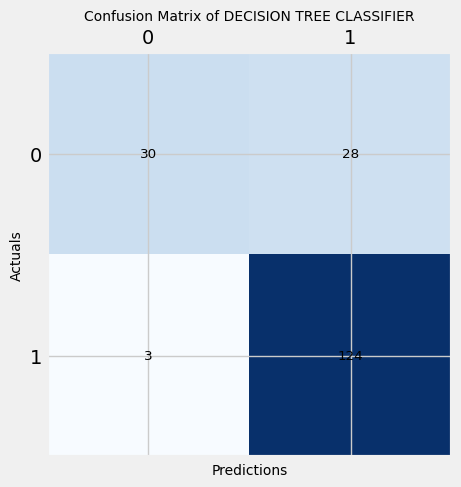

In [144]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-small')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix of DECISION TREE CLASSIFIER', fontsize=10)
plt.show()


## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rfc = RandomForestClassifier()

In [147]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [148]:
rfc.score(x_train, y_train)

1.0

In [149]:
rfc.score(x_test, y_test)

0.8108108108108109

In [150]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=20, max_depth=3 )

In [151]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.8018648018648019

In [152]:
rfc.score(x_test, y_test)

0.827027027027027

In [153]:
print("Accuracy is", rfc.score(x_test, y_test))

Accuracy is 0.827027027027027


In [154]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [155]:
y_pred = rfc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.802548,0.827027,0.883417,0.853255
recall,0.465517,0.992126,0.827027,0.728822,0.827027
f1-score,0.627907,0.887324,0.827027,0.757615,0.805993
support,58.000000,127.000000,0.827027,185.000000,185.000000


In [156]:
confusion_matrix(y_test, y_pred)

array([[ 27,  31],
       [  1, 126]], dtype=int64)

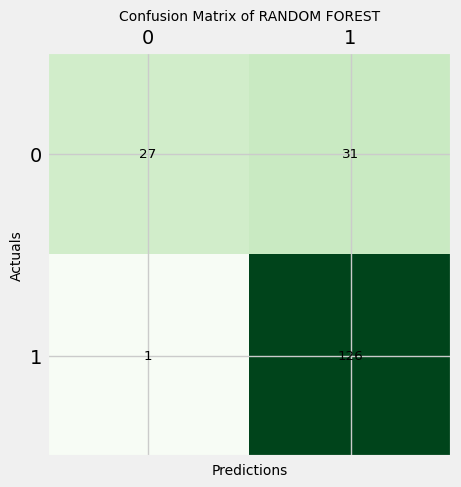

In [157]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-small')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix of RANDOM FOREST', fontsize=10)
plt.show()